# **Stroke Data Analysis**

According to the World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## **Attribute Information**

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have 
hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note*: "Unknown" in smoking_status means that the information is unavailable for this patient



In [1]:
#Importing the dependencies
import pandas as pd
import numpy as np
from numpy import where
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
#Importing the data and having a quick look at the first 5 rows.
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#Getting a summary about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
#Looking at the shape of the data
df.shape

(5110, 12)

In [5]:
#Getting descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


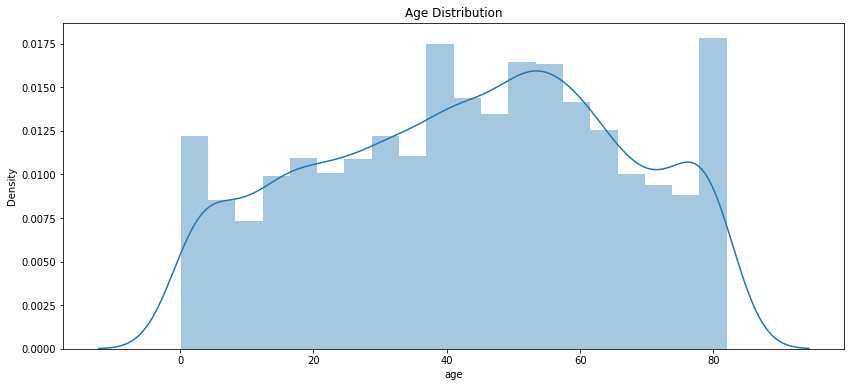

In [6]:
#Looking at the distribution of the features

plt.figure(figsize = (14, 6))
sns.distplot(df['age'])
plt.title('Age Distribution');

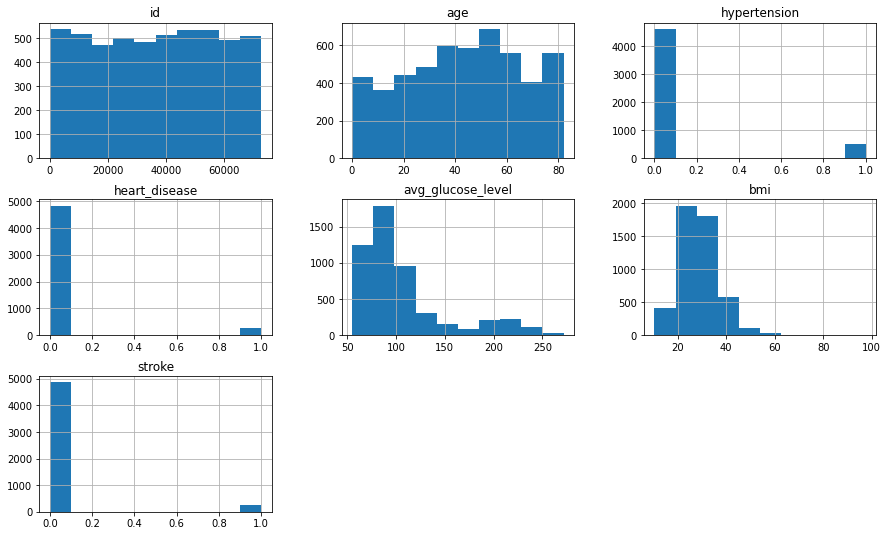

In [7]:
df.hist(figsize=(15,9));

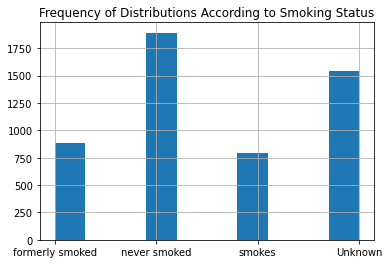

In [8]:
df.smoking_status.hist().set_title("Frequency of Distributions According to Smoking Status");

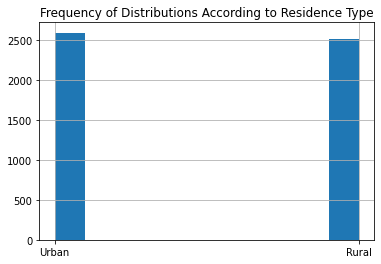

In [9]:
df.Residence_type.hist().set_title("Frequency of Distributions According to Residence Type");

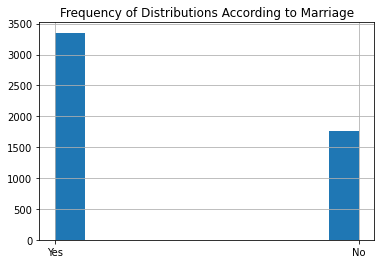

In [10]:
df.ever_married.hist().set_title("Frequency of Distributions According to Marriage");

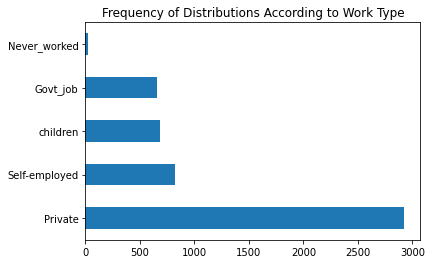

In [11]:
df["work_type"].value_counts().plot.barh().set_title("Frequency of Distributions According to Work Type");

We can see that there is a very large imbalance between people who have stroke and who have not.

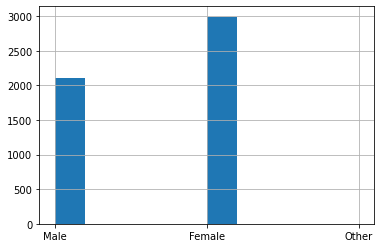

In [12]:
df.gender.hist()

Since there is "Other" gender category, there might be very little data. Let's observe. 

In [13]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Since there is only 1 row with "Other" gender, we can drop it.

In [14]:
df.drop(df[df["gender"]=="Other"].index,inplace=True)

We can now check whether there are any missing values in the dataframe.

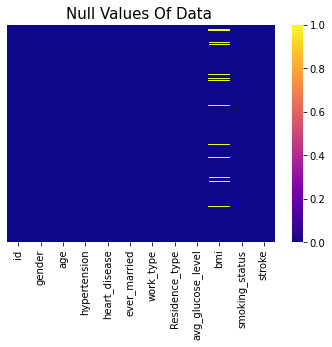

In [15]:
sns.heatmap(df.isnull(), yticklabels = False, cmap='plasma')
plt.title('Null Values Of Data ',size=15);

In [16]:
print(f"The percentage of the null values in body mass index (bmi) column is %{round(df.bmi.isnull().sum()/len(df),2)}")

The percentage of the null values in body mass index (bmi) column is %0.04


Since null values in bmi is very small, we can drop them.

In [17]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(columns=["index"])

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4903,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
4904,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4905,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
4906,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [18]:
df.shape

(4908, 13)

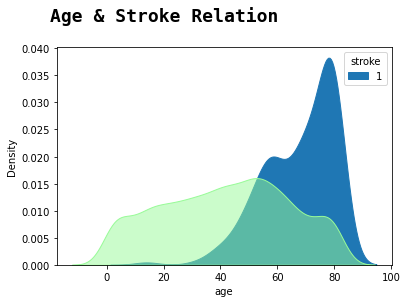

In [19]:
#Now, let's observe the relation between age and stroke
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.text(-20,0.045,'Age & Stroke Relation',fontsize=18,fontweight='bold', fontfamily='monospace')
sns.kdeplot(data=df[df.stroke==1],x='age',hue = "stroke", shade=True,ax = ax1 ,color='lightcoral',alpha=1)
sns.kdeplot(data=df[df.stroke==0],x='age',shade=True,ax = ax1,color='palegreen',alpha=0.5);

We can see that after the age 40, stroke observations strictly increases.

Also, the density of stroke is around age 80. 

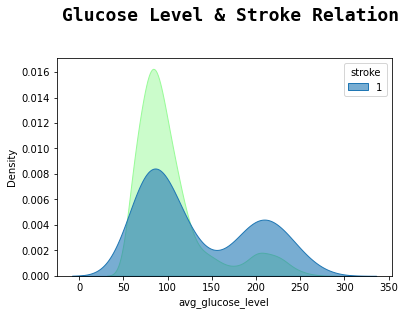

In [20]:
#Let's observe the relationship between glucose level and stroke
fig1 = plt.figure()
ax2 = fig1.add_subplot(1, 1, 1)
ax2.text(-20,0.020,'Glucose Level & Stroke Relation',fontsize=18,fontweight='bold', fontfamily='monospace')
sns.kdeplot(data=df[df.stroke==0],x='avg_glucose_level',shade=True,ax = ax2, color='palegreen',alpha=0.5)
sns.kdeplot(data=df[df.stroke==1],x='avg_glucose_level',hue = "stroke",shade=True,ax = ax2,color='Red',alpha=0.6);

We can conclude that there is a very strong relation between average glucose level and stroke.

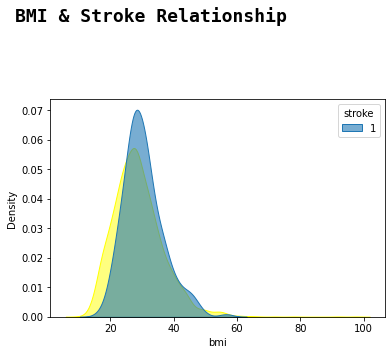

In [21]:
#Let's observe the relationship between body mass index and stroke
fig1 = plt.figure()
ax3 = fig1.add_subplot(1, 1, 1)
ax3.text(-10,0.10,'BMI & Stroke Relationship',fontsize=18,fontweight='bold', fontfamily='monospace')
sns.kdeplot(data=df[df.stroke==0],x='bmi',shade=True,ax = ax3, color='yellow',alpha=0.5)
sns.kdeplot(data=df[df.stroke==1],x='bmi',hue = "stroke",shade=True,ax = ax3,color='lightcoral',alpha=0.6);

Obviously, there is also a strong connection between body mass index and stroke.

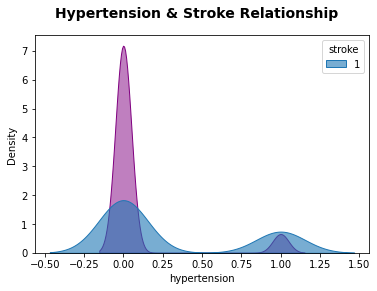

In [22]:
#Let's observe the relationship between hypertension and stroke
fig1 = plt.figure()
ax4 = fig1.add_subplot(1, 1, 1)
sns.kdeplot(data=df[df.stroke==0],x='hypertension',shade=True,ax = ax4, color='Purple',alpha=0.5)
sns.kdeplot(data=df[df.stroke==1],x='hypertension',hue = "stroke",shade=True,ax = ax4,color='lightcoral',alpha=0.6)
fig1.suptitle('Hypertension & Stroke Relationship', fontsize=14, fontweight='bold');

Hypertension is also highly related with stroke.

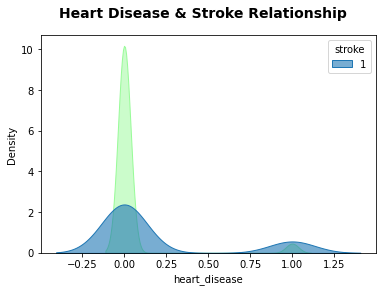

In [23]:
#Let's observe the relationship between heart disease and stroke
fig1 = plt.figure()
ax5 = fig1.add_subplot(1, 1, 1)
sns.kdeplot(data=df[df.stroke==0],x='heart_disease',shade=True,ax = ax5, color='palegreen',alpha=0.5)
sns.kdeplot(data=df[df.stroke==1],x='heart_disease',hue = "stroke",shade=True,ax = ax5,color='lightcoral',alpha=0.6)
fig1.suptitle('Heart Disease & Stroke Relationship', fontsize=14, fontweight='bold');

Heart disease is also highly related with stroke.

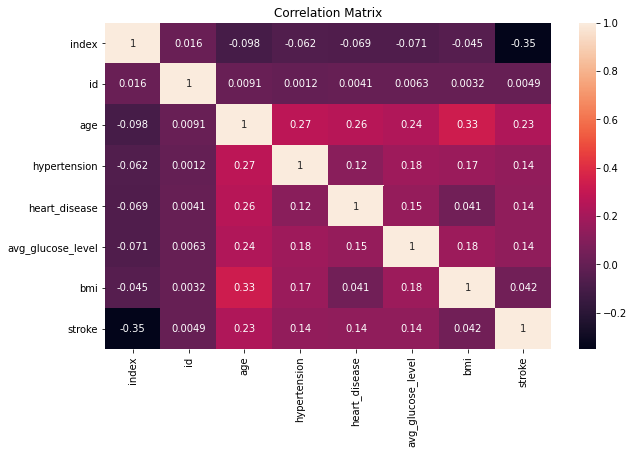

In [24]:
#Now, we can take a look at correlations between the variables.

corr=df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix');

There seems no multicollinearity in the data. No variable is strictly correlated with any other.

In [25]:
#Before building a machine learning model, we are converting object datatype variables to numeric variables using pd.get_dummies()
object_variables=["gender","ever_married","work_type","Residence_type","smoking_status"]
for item in object_variables:
  dummies  = pd.get_dummies(df[item])
  df = pd.concat([df,dummies],axis='columns')
  df.drop([item],axis='columns',inplace=True)
df

,index,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Female,Male,No,Yes,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,0,9046,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,2,31112,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,3,60182,49.0,0,0,171.23,34.4,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,4,1665,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
4,5,56669,81.0,0,0,186.21,29.0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,5104,14180,13.0,0,0,103.08,18.6,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0
4904,5106,44873,81.0,0,0,125.20,40.0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
4905,5107,19723,35.0,0,0,82.99,30.6,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
4906,5108,37544,51.0,0,0,166.29,25.6,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


In [26]:
#Specifying dependent and independent variables
X=df.drop(columns=["id","stroke"])
y=df["stroke"]
X

,index,age,hypertension,heart_disease,avg_glucose_level,bmi,Female,Male,No,Yes,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,0,67.0,0,1,228.69,36.6,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
1,2,80.0,0,1,105.92,32.5,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,3,49.0,0,0,171.23,34.4,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
4,5,81.0,0,0,186.21,29.0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,5104,13.0,0,0,103.08,18.6,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0
4904,5106,81.0,0,0,125.20,40.0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
4905,5107,35.0,0,0,82.99,30.6,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
4906,5108,51.0,0,0,166.29,25.6,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


In [27]:
#Splitting the data into test-train sets
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

We will use Random Forest Classifier, Logistic Regression, and Support Vector Machine Classifier as ML models.

In [28]:
#Scaling our independent variables  with the help of StandardScaler
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale  = scaler.fit_transform(X_test)

In [29]:
svc_model=SVC()
svc_model.fit(X_train_scale, y_train)
y_preds_svc=svc_model.predict(X_test)
print(classification_report(y_test, y_preds_svc))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1175
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1227
   macro avg       0.48      0.50      0.49      1227
weighted avg       0.92      0.96      0.94      1227



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train_scale,y_train)
y_preds_rf=rf_model.predict(X_test)
print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1175
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1227
   macro avg       0.48      0.50      0.49      1227
weighted avg       0.92      0.96      0.94      1227



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train_scale,y_train)
y_preds_logistic=logistic_model.predict(X_test)
print(classification_report(y_test, y_preds_logistic))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1175
           1       1.00      0.04      0.07        52

    accuracy                           0.96      1227
   macro avg       0.98      0.52      0.53      1227
weighted avg       0.96      0.96      0.94      1227



Since we already have very high accuracy score, we do not need to fine tune the model.

We can also take a look at confusion matrices.

In [32]:
def ConfusionMatrix(confusion):
  groups = ['TN','FP','FN','TP']
  counts = ['{0:0.0f}'.format(value) for value in confusion.flatten()]
  labels = np.asarray([f'{v1}\n{v2}' for v1, v2 in zip(groups, counts)]).reshape(2, 2)
  sns.heatmap(confusion, annot=labels, cmap='Blues', cbar=False, fmt='')

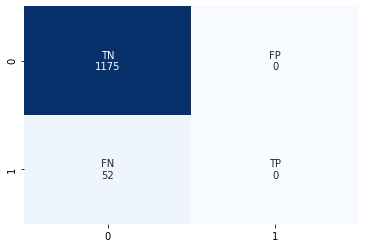

In [33]:
ConfusionMatrix(confusion_matrix(y_test, y_preds_svc))

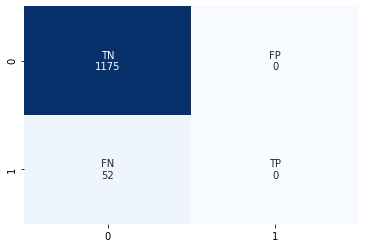

In [34]:
ConfusionMatrix(confusion_matrix(y_test, y_preds_rf))

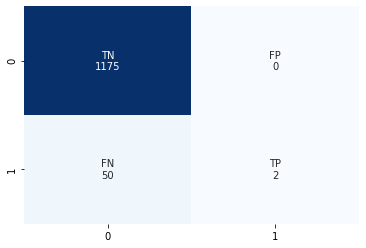

In [35]:
ConfusionMatrix(confusion_matrix(y_test, y_preds_logistic))

Since there is an imbalance in the dataset, those who have stroke cannot be classified well. One way to overcome this issue is to oversample the examples in the minority class, in this case, those with stroke. This can be achieved by simply duplicating examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional information to the model. The most widely used approach to synthesizing new examples is called the **Synthetic Minority Oversampling Technique**, or **SMOTE** for short. This is what we are going to do now.

In [36]:
pip install imbalanced-learn

In [40]:
pip install delayed

In [41]:
#Oversampling the examples with SMOTE technique.

from collections import Counter
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42,sampling_strategy={1:500})
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 9900, 1: 500})


In [42]:
#Resplitting the oversampled data.

xtrain, xtest, ytrain, ytest = train_test_split(X_res, y_res, test_size=0.30, random_state=0)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

xtrain shape
(7280, 2)
xtest shape
(3120, 2)


In [47]:
#Rebuilding our models and observe how they classified the data.

svc_model_new=SVC()
svc_model_new.fit(xtrain, ytrain)
y_preds_svc_new=svc_model_new.predict(xtest)
print(classification_report(ytest, y_preds_svc_new))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2986
           1       0.94      0.69      0.79       134

    accuracy                           0.98      3120
   macro avg       0.96      0.84      0.89      3120
weighted avg       0.98      0.98      0.98      3120



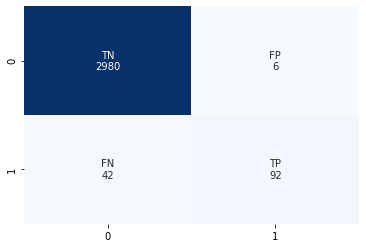

In [48]:
ConfusionMatrix(confusion_matrix(ytest, y_preds_svc_new))

In [49]:
rf_model_new=RandomForestClassifier()
rf_model_new.fit(xtrain, ytrain)
y_preds_rf_new=rf_model_new.predict(xtest)
print(classification_report(ytest, y_preds_rf_new))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2986
           1       0.88      0.76      0.82       134

    accuracy                           0.99      3120
   macro avg       0.93      0.88      0.90      3120
weighted avg       0.98      0.99      0.98      3120



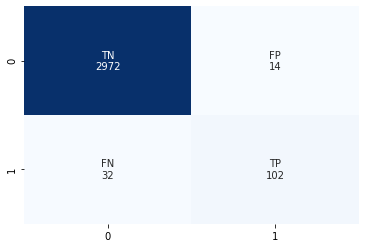

In [50]:
ConfusionMatrix(confusion_matrix(ytest, y_preds_rf_new))

In [51]:
logistic_model_new=LogisticRegression()
logistic_model_new.fit(xtrain, ytrain)
y_preds_logistic_new=logistic_model_new.predict(xtest)
print(classification_report(ytest, y_preds_logistic_new))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2986
           1       0.94      0.68      0.79       134

    accuracy                           0.98      3120
   macro avg       0.96      0.84      0.89      3120
weighted avg       0.98      0.98      0.98      3120



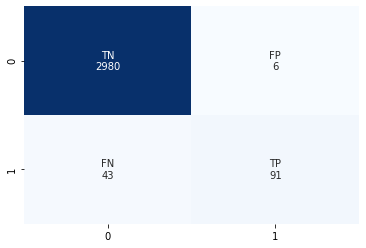

In [52]:
ConfusionMatrix(confusion_matrix(ytest, y_preds_logistic_new))

The best result is achieved using Random Forest Classifier, looking at its F1 score and the confusion matrix.